## 保存 & 读取本地变量
### ①使用pickle@`save_variable1(v, filename)`， `load_variavle1(filename)`
#### 可以保存原变量的类型，*save函数执行写文件，可以返回文件路径；load函数可以返回维持原类型的变量，`e.g., 原来是字典，返回还是字典`*
### ②使用read, write@`save_variable2(v, filename)`， `load_variavle2(filename)`
#### 只能作为字符串查看，*save函数执行写文件，可以返回文件路径；load函数统一返回字符串*

In [130]:
import pickle
# Input: 变量名，保存路径
# Output: 保存路径
def save_variable1(v, filename):
    f = open(filename, 'wb')
    pickle.dump(v, f, 0)  # 在dump()里加上第三个参数，设为0(ASCII协议).
    f.close()
    return filename

In [131]:
# Input: 保存的变量路径
# Output: 变量
def load_variable1(filename):
    f = open(filename, 'rb')
    r = pickle.load(f)
    f.close()
    return r

In [132]:
def save_variable2(v, filename):
    try: 
        # f = open('test001.txt','w',encoding='utf-8') #open 打开要写入的文件，'w'就是写入的意思，如果有中文encoding进行编码
        with open(filename,'w',encoding='utf-8') as f:
            f.write(v)  # write是写入的意思，将（）中的内容写入到f文件里
            
    # 无论try中的程序是否存在报错，则都执行下面的关闭
    finally: 
        if f:  # 判断下f是否打开了，如果没打开则不需要关闭，打开了则关闭
            f.close()
    return filename

In [133]:
def load_variable2(filename):
    # 首先try一下，如果程序打开以及在打开后读取一系列操作后有报错，则不中断程序
    try:  
        # f = open(filename, 'r', encoding='utf-8')
        with open(filename, 'r', encoding='utf-8') as f:
            strContent = f.read()
    # 无论try中的程序是否存在报错，则都执行下面的关闭
    finally:  
        if f:  # 判断下f是否打开了，如果没打开则不需要关闭，打开了则关闭
            f.close()
    return strContent

## 多线程 vs 不用线程
（处理24小时的词频，提取每小时top200的高频词，并保存在文件中）

In [1]:
import pymongo
con_str = "localhost:27017"
db = pymongo.MongoClient(con_str, serverSelectionTimeoutMS = 10000)
try:
    # print(db.server_info())
    
    # 查询数据库中所有数据库的名称
    db_names = db.list_database_names()
    print(db_names)
except Exception:
    print("connect failed!")
    
targetDB = 'db_Weibo_SH_0331_All'

if targetDB in db_names:
    db_Weibo_SH_0331_All = db['db_Weibo_SH_0331_All']
    print(targetDB + ": 已连接！")

['admin', 'config', 'db_Weibo_SH_0331_All', 'db_tvcgR3', 'db_weiboDB', 'local', 'test', 'weiboInfoAll']
db_Weibo_SH_0331_All: 已连接！


### 小规模测试 ---------------------------------- start ↓
* 提取高频词
* 做出词频图
* 词云图

In [2]:
col_weibo_timePeriod0 = db_Weibo_SH_0331_All['col_weibo_timePeriod0']

In [3]:
targetCol = col_weibo_timePeriod0

tempWords = list()  # 
tempCnt_Words = 0  # 存放当前集合中的词的总数

freqWords = {}  # key(词汇)，value(词频数)

for cW in targetCol.find():
    # 函数统计词频（小规模的时候可以用list连接起来成一个大的list来实现）
    # tempWords = tempWords + cW.get('plusCutting')  # 多个list合并为一个list
    # tempCnt_Words = tempCnt_Words + len(cW.get('plusCutting'))  # 3273720

    # 手动写词频统计函数，基于字典实现
    currentContent = cW.get('plusCutting')
    tempCnt_Words = tempCnt_Words + len(currentContent)  # 存放当前集合中的词的总数
    
    for eachWord in currentContent:
        # print(eachWord)
        freqWords[eachWord] = freqWords.get(eachWord, 0) + 1


items = list(freqWords.items())  # 转换为list
print("items.len = " + str(len(items)))
items.sort(key=lambda x: x[1], reverse=True)  # 按照词频排序

wordcloudDic = dict()  # 存放前k个词 & 词频
for i in range(100):
    word, count = items[i]
    wordcloudDic[word] = count
    # print("{0:<20}{1:>10}".format(word, count))

print(tempCnt_Words)
print(wordcloudDic)


items.len = 63090
17104459
{' ': 412126, '医院': 317327, '病人': 296959, '点': 256815, '120': 243494, '疫情': 230199, '未': 219064, '年': 191733, '小区': 190830, '30': 186022, '2022': 185598, '月': 163746, '做': 163094, '日': 162666, '救治': 149482, '救助': 145203, '离世': 144790, '804': 144579, '发作': 144578, '邻居': 124111, '这是': 112962, '孩子': 112110, '警察': 110981, '分': 110780, '救护车': 110009, '阻拦': 109875, '哮喘': 108914, '上午': 108694, '心情': 108605, '上海': 99770, '核酸': 97798, '岁': 88778, '工作': 88104, '到达': 87535, '真的': 85354, '新冠': 82503, '这位': 81252, '爸爸': 80408, '措施': 78728, '抗疫': 77797, '11': 75271, '12345': 74553, '找': 73460, '猫': 73452, '急救': 73046, '过世': 73020, '40': 72930, '开': 72924, '停': 72821, '楼下': 72731, '室': 72704, '110': 72623, '死于': 72601, '关闭': 72450, '车': 72445, '得知': 72416, '寻求': 72403, '除颤': 72388, '202': 72358, '仪': 72350, '扎堆': 72337, '警车': 72281, '到场': 72276, '殡仪': 72252, '说': 61846, '防控': 54786, '住': 51768, '浦东': 50331, '检测': 49588, '情况': 47694, '提供': 43881, '第二辆': 43268, '大白': 43035, '

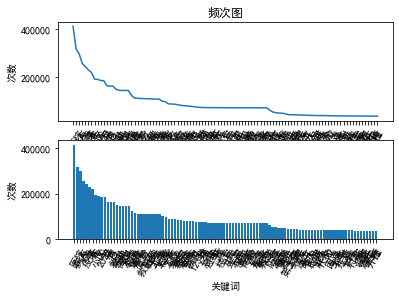

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x1 = list(wordcloudDic.keys())
y1 = list(wordcloudDic.values())
plt.subplot(211)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第1个切割块
plt.plot(x1, y1)
plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
plt.ylabel('次数')
plt.title('频次图')

plt.subplot(212)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第2个切割块
plt.bar(x1, y1)
plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
plt.xlabel('关键词')
plt.ylabel('次数')
plt.savefig('E:\\picture_bar_line.jpg',dpi=500)

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import ImageFont


# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

# x1 = list(wordcloudDic.keys())
# y1 = list(wordcloudDic.values())
# plt.subplot(211)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第1个切割块
# plt.plot(x1, y1)
# plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
# plt.ylabel('次数')
# plt.title('频次图')

# plt.subplot(212)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第2个切割块
# plt.bar(x1, y1)
# plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
# plt.xlabel('关键词')
# plt.ylabel('次数')

font = 'msyh.ttc'
wc = WordCloud(
    background_color='white',  # 设置背景色，默认为黑色
    font_path=font,  # 指定文字路径
    width=500,  # 设置背景宽
    height=350,  # 设置背景高
    max_font_size=50,  # 最大字体
    min_font_size=10,  # 最小字体
    mode='RGBA'  # 当参数为“RGBA”并且background_color不为空时，背景为透明
)

wc.generate_from_frequencies(wordcloudDic)
wc.to_file("词云测试.png")

# plt.imshow(wc)
# plt.axis('off')
# # plt.show()

# plt.savefig('E:\\picture_wordcloud.jpg',dpi=500)

### 小规模测试 ---------------------------------- end ↑

## 批量处理*`词频统计`*

In [134]:
# key：集合的名称
# value: 集合中所有词的数量，不一样的词的数量，词频字典

# wordFreqDict = {
#     'col_weibo_timePeriod0' : [17104459, 63090, {'抗疫': 77797, '11': 75271, '12345': 74553, ...}]
#     'col_weibo_timePeriod1' : [14104454, 6308, {'疫情': 77797, '11': 75271, '12345': 74553, ...}]
# }

def computeWordFreq(targetCol, wordFreqDict, topK):
    
    wordFreqDict[targetCol] = list()
    
    exec(targetCol + " = db_Weibo_SH_0331_All['" + targetCol+ "']")
    exec("recs = " + targetCol + ".find()")
    loc = locals()
    
    tempCnt_Words = 0  # ●1 存放当前集合中的词的总数

    freqWords = {}  # key(词汇)，value(词频数)

    for cW in loc['recs']:
        # 手动写词频统计函数，基于字典实现
        currentContent = cW.get('plusCutting')
        tempCnt_Words = tempCnt_Words + len(currentContent)  # 存放当前集合中的词的总数

        for eachWord in currentContent:
            freqWords[eachWord] = freqWords.get(eachWord, 0) + 1

    items = list(freqWords.items())  # 转换为list
    # print("items.len = " + str(len(items)))  # ●2 不一样的词的个数
    items.sort(key=lambda x: x[1], reverse=True)  # 按照词频排序

    wordcloudDic = dict()  # ●3 存放前k个词 & 词频
    for i in range(topK):
        word, count = items[i]
        wordcloudDic[word] = count
        # print("{0:<20}{1:>10}".format(word, count))
        
    wordFreqDict[targetCol].append(tempCnt_Words)
    wordFreqDict[targetCol].append(len(items))
    wordFreqDict[targetCol].append(wordcloudDic)



In [137]:
# 没用多线程
import time

if __name__ == '__main__':
    startTime = time.time() 
    
    # 循环操作24个集合：新建指定字段
    subCol24 = list()
    subCol24.append(["col_weibo_timePeriod" + str(period) for period in range(0, 24)])
    print(subCol24[0])
    colPackages = subCol24[0]

    wordFreqDictNoThread = dict()
    
    topK = 200  # 返回的是前200个高频词
    
#     threads = []
    for i in range(0, len(colPackages)):
        print(colPackages[i])
        computeWordFreq(colPackages[i], wordFreqDictNoThread, topK)
        
#         t = myThread("col" + str(i), colPackages[i], wordFreqDict, topK)
#         t.start()
#         threads.append(t)
        
#     [thread.join() for thread in threads]
#     print ("退出主线程")
    
    endTime = time.time()    
    print("---------------> Time consuming: %.2f" % (endTime - startTime))
    save_variable1(wordFreqDictNoThread, 'wordFreqDictNoThread_WithType.txt')
    save_variable2(str(wordFreqDictNoThread), 'wordFreqDictNoThread_WithoutType.txt')  # 只能查看字符串

['col_weibo_timePeriod0', 'col_weibo_timePeriod1', 'col_weibo_timePeriod2', 'col_weibo_timePeriod3', 'col_weibo_timePeriod4', 'col_weibo_timePeriod5', 'col_weibo_timePeriod6', 'col_weibo_timePeriod7', 'col_weibo_timePeriod8', 'col_weibo_timePeriod9', 'col_weibo_timePeriod10', 'col_weibo_timePeriod11', 'col_weibo_timePeriod12', 'col_weibo_timePeriod13', 'col_weibo_timePeriod14', 'col_weibo_timePeriod15', 'col_weibo_timePeriod16', 'col_weibo_timePeriod17', 'col_weibo_timePeriod18', 'col_weibo_timePeriod19', 'col_weibo_timePeriod20', 'col_weibo_timePeriod21', 'col_weibo_timePeriod22', 'col_weibo_timePeriod23']
col_weibo_timePeriod0
col_weibo_timePeriod1
col_weibo_timePeriod2
col_weibo_timePeriod3
col_weibo_timePeriod4
col_weibo_timePeriod5
col_weibo_timePeriod6
col_weibo_timePeriod7
col_weibo_timePeriod8
col_weibo_timePeriod9
col_weibo_timePeriod10
col_weibo_timePeriod11
col_weibo_timePeriod12
col_weibo_timePeriod13
col_weibo_timePeriod14
col_weibo_timePeriod15
col_weibo_timePeriod16
col_

In [135]:
import threading
import time

class myThread(threading.Thread):
    def __init__(self, threadName, targetCol, wordFreqDict, topK):
        threading.Thread.__init__(self)
        self.threadName = threadName
        self.targetCol = targetCol
        self.wordFreqDict = wordFreqDict
        self.topK = topK
        
    def run(self):
        print ("开始线程：" + str(self.threadName))
        computeWordFreq(self.targetCol, self.wordFreqDict, self.topK)
        print ("退出线程：" + str(self.threadName))

In [139]:
# 用了多线程
import time

if __name__ == '__main__':
    startTime = time.time() 
    
    # 循环操作24个集合：新建指定字段
    subCol24 = list()
    subCol24.append(["col_weibo_timePeriod" + str(period) for period in range(0, 24)])
    print(subCol24[0])
    colPackages = subCol24[0]

    wordFreqDictMulThread = dict()
    
    topK = 200  # 返回的是前200个高频词
    
    threads = []
    for i in range(0, len(colPackages)):
        print(colPackages[i])
        t = myThread("col" + str(i), colPackages[i], wordFreqDictMulThread, topK)
        t.start()
        threads.append(t)
        
    [thread.join() for thread in threads]
    print ("退出主线程")
    
    endTime = time.time()    
    print("---------------> Time consuming: %.2f" % (endTime - startTime))
    save_variable1(wordFreqDictMulThread, 'wordFreqDictMulThread_WithType1121.txt')
    save_variable2(str(wordFreqDictMulThread), 'wordFreqDictMulThread_WithoutType1121.txt')  # 只能查看字符串

['col_weibo_timePeriod0', 'col_weibo_timePeriod1', 'col_weibo_timePeriod2', 'col_weibo_timePeriod3', 'col_weibo_timePeriod4', 'col_weibo_timePeriod5', 'col_weibo_timePeriod6', 'col_weibo_timePeriod7', 'col_weibo_timePeriod8', 'col_weibo_timePeriod9', 'col_weibo_timePeriod10', 'col_weibo_timePeriod11', 'col_weibo_timePeriod12', 'col_weibo_timePeriod13', 'col_weibo_timePeriod14', 'col_weibo_timePeriod15', 'col_weibo_timePeriod16', 'col_weibo_timePeriod17', 'col_weibo_timePeriod18', 'col_weibo_timePeriod19', 'col_weibo_timePeriod20', 'col_weibo_timePeriod21', 'col_weibo_timePeriod22', 'col_weibo_timePeriod23']
col_weibo_timePeriod0
开始线程：col0
col_weibo_timePeriod1
开始线程：col1
col_weibo_timePeriod2
开始线程：col2col_weibo_timePeriod3

开始线程：col3
col_weibo_timePeriod4
开始线程：col4
col_weibo_timePeriod5
开始线程：col5col_weibo_timePeriod6

开始线程：col6
col_weibo_timePeriod7
开始线程：col7
col_weibo_timePeriod8
开始线程：col8
col_weibo_timePeriod9
开始线程：col9col_weibo_timePeriod10

开始线程：col10
col_weibo_timePeriod11
开始线程：col

In [109]:
# 小规模测试(可删除，建议保留)
# -------------------------------------
# targetCol = 'col_weibo_timePeriod1'
# wordFreqDict = dict()

def ccc(targetCol, wordFreqDict):
    wordFreqDict[targetCol] = list()
    for i in range(0,3+1):
        tempCnt_Words = i
    items = ['a','b']
    wordcloudDic = {' ': 412126, '医院': 317327, '病人': 2969590}

    wordFreqDict[targetCol].append(tempCnt_Words)
    wordFreqDict[targetCol].append(len(items))
    wordFreqDict[targetCol].append(wordcloudDic)
# wordFreqDict[targetCol] = 1


if __name__ == '__main__':
    wordFreqDict = dict()
    for tC in ['col_weibo_timePeriod0', 'col_weibo_timePeriod1']:
        ccc(tC, wordFreqDict)


wordFreqDict

{'col_weibo_timePeriod0': [3, 2, {' ': 412126, '医院': 317327, '病人': 2969590}],
 'col_weibo_timePeriod1': [3, 2, {' ': 412126, '医院': 317327, '病人': 2969590}]}